# Perturbation cost trajectories for different models, adversarials generated for different models

In [ ]:
import os
os.chdir("../")
import sys
import json
from argparse import Namespace
import numpy as np
from sklearn import metrics
from sklearn.metrics import pairwise_distances as dist
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper')

import provable_robustness_max_linear_regions.data as dt
from generate_perturbation_cost_trajectories import calculate_perturbation_cost_data
from utils import NumpyEncoder

## Plot settings:

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text', usetex=True)

# dictionary that maps color string to 'good looking' seaborn colors that are easily distinguishable
colors = {
    "orange": sns.xkcd_rgb["yellowish orange"],
    "red": sns.xkcd_rgb["pale red"],
    "green": sns.xkcd_rgb["medium green"],
    "blue": sns.xkcd_rgb["denim blue"],
    "yellow": sns.xkcd_rgb["amber"],
    "purple": sns.xkcd_rgb["dusty purple"],
    "cyan": sns.xkcd_rgb["cyan"]
}

## Calculate perturbation cost data:
Estimated runtime (if no file with data is present): 3 hours

In [3]:
def load_from_json(file_name):

    if not os.path.exists("res/" + file_name + ".json"):
        return None
    else:
        with open("res/" + file_name + ".json", 'r') as fp:
            return json.load(fp)
        
def save_to_json(dictionary, file_name):
        
    if not os.path.exists("res"):
        os.makedirs("res")

    with open("res/" + file_name + ".json", 'w') as fp:
        json.dump(dictionary, fp, cls = NumpyEncoder)

n_points = 1000
perturbation_cost_data = load_from_json("pert_cost_data_for_all_croce_models_with_adv_transfer_n_points={}".format(n_points))

croce_model_paths = ["provable_robustness_max_linear_regions/models/plain/2019-02-24 00:50:45 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=0.0 gamma_rb=0.0 gamma_db=0.0 ae_frac=0.0 lr=0.001 epoch=100.mat","provable_robustness_max_linear_regions/models/mmr+at/2019-02-17 01:54:16 dataset=mnist nn_type=cnn_lenet_small p_norm=inf lmbd=0.5 gamma_rb=0.2 gamma_db=0.2 ae_frac=0.5 epoch=100.mat", "provable_robustness_max_linear_regions/models/mmr+at/2019-02-24 00:04:27 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=6.0 gamma_rb=0.45 gamma_db=0.45 ae_frac=0.5 lr=5e-05 epoch=50.mat"]

if not perturbation_cost_data:
    
    perturbation_cost_data = dict()
    
    for model_path in croce_model_paths:
        args = Namespace()

        args.dataset = "mnist"
        args.n_points = n_points
        args.model_path = model_path
        args.adversarial_model_paths = croce_model_paths
        args.nn_type = "cnn"
        args.norms = ["inf"]
        args.noise_types = ["gaussian"]
        args.noise_sizes = [None]
        args.splits = [{"inf": [0.0, np.inf], "2": [0.0, np.inf]}]
        args.save = False
        args.plot = False
        
        file_name = model_path.split("/")[3]
        model_name = file_name.split(".mat")[0]
        perturbation_cost_data[model_name] = calculate_perturbation_cost_data(args)
    
    save_to_json(perturbation_cost_data, "pert_cost_data_for_all_croce_models_with_adv_transfer_n_points={}".format(n_points))

## Plot:

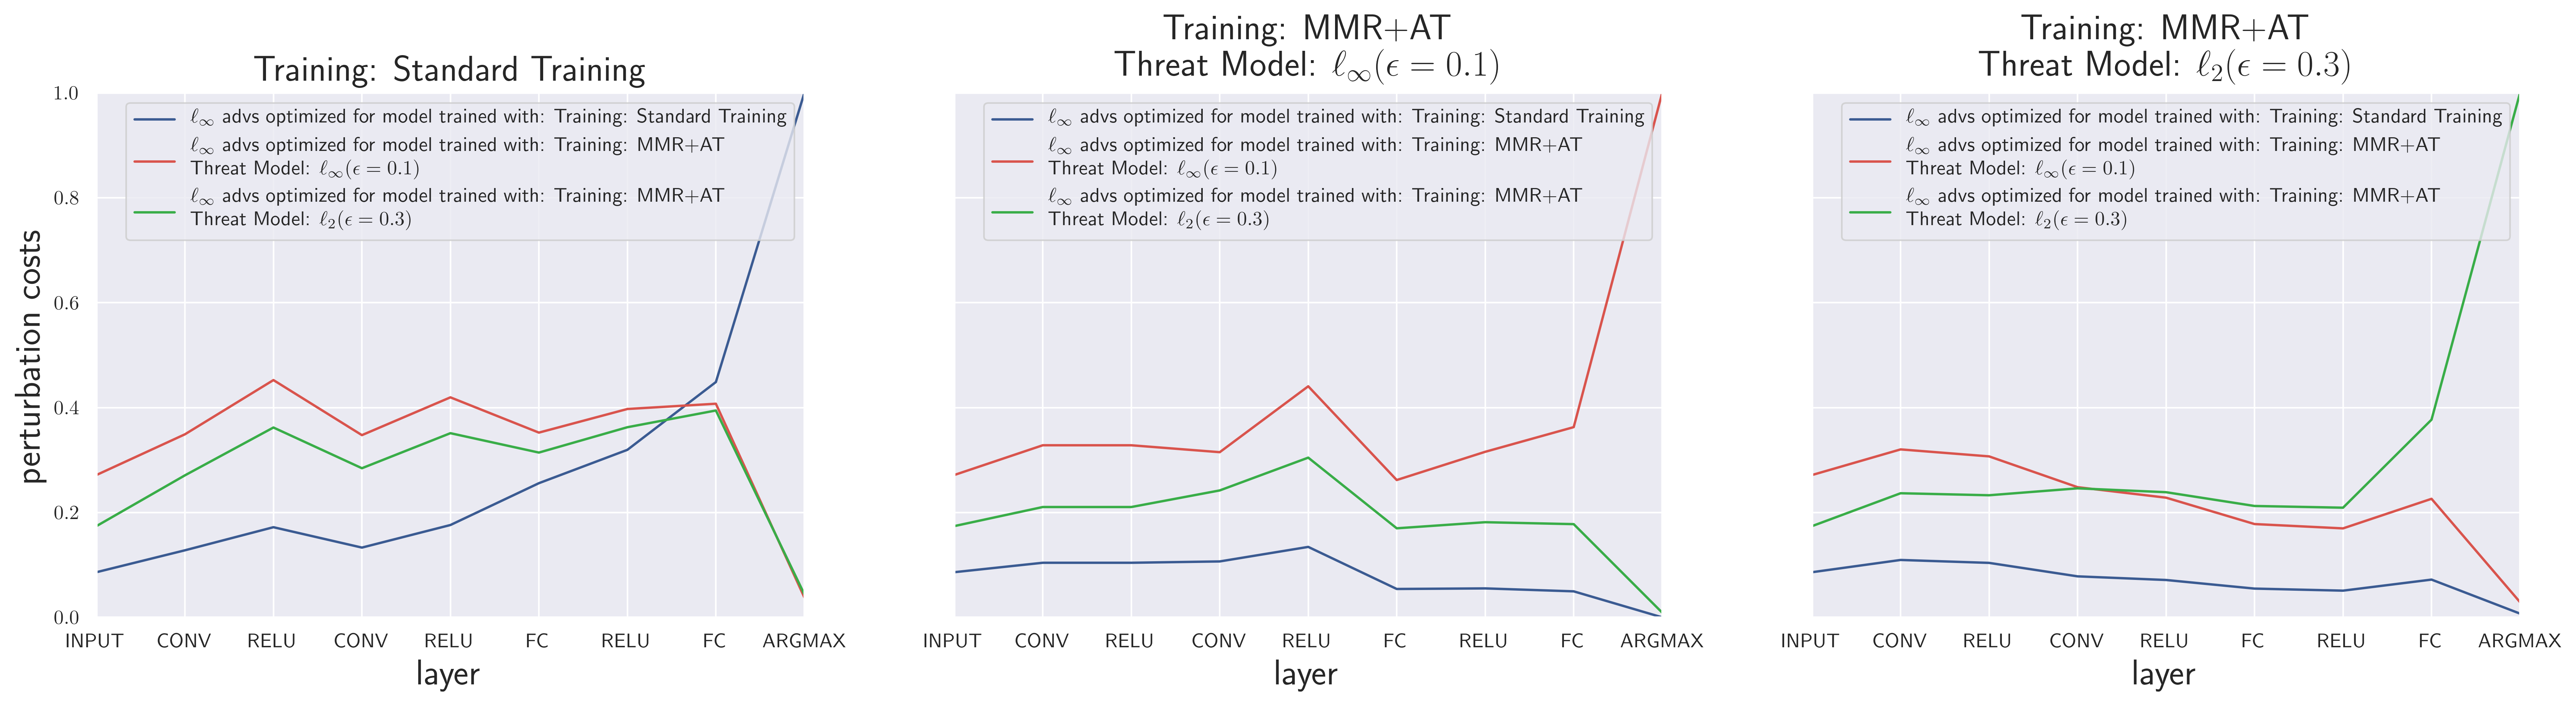

In [6]:
# name to save the plot
save_name = "fig_pc_different_adversarials_for_different_models"

file_name = "pert_cost_data_for_all_croce_models_with_adv_transfer_n_points={}".format(n_points)

model_names = ["2019-02-24 00:50:45 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=0.0 gamma_rb=0.0 gamma_db=0.0 ae_frac=0.0 lr=0.001 epoch=100", "2019-02-17 01:54:16 dataset=mnist nn_type=cnn_lenet_small p_norm=inf lmbd=0.5 gamma_rb=0.2 gamma_db=0.2 ae_frac=0.5 epoch=100", "2019-02-24 00:04:27 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=6.0 gamma_rb=0.45 gamma_db=0.45 ae_frac=0.5 lr=5e-05 epoch=50"]
model_name_dict = {"2019-02-24 00:50:45 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=0.0 gamma_rb=0.0 gamma_db=0.0 ae_frac=0.0 lr=0.001 epoch=100": "Training: Standard Training", "2019-02-17 01:54:16 dataset=mnist nn_type=cnn_lenet_small p_norm=inf lmbd=0.5 gamma_rb=0.2 gamma_db=0.2 ae_frac=0.5 epoch=100": "Training: MMR+AT\nThreat Model: $\ell_\infty(\epsilon=0.1)$", "2019-02-24 00:04:27 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=6.0 gamma_rb=0.45 gamma_db=0.45 ae_frac=0.5 lr=5e-05 epoch=50": "Training: MMR+AT\nThreat Model: $\ell_2(\epsilon=0.3)$"}

# number of model types and parameter combinations
n_cols = 3
n_rows = 1

fig, ax = plt.subplots(n_rows, n_cols, figsize = (6 * n_cols, 5 * n_rows), sharey = True, dpi=400)

linestyle = "-"
color_dict = {"2019-02-24 00:50:45 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=0.0 gamma_rb=0.0 gamma_db=0.0 ae_frac=0.0 lr=0.001 epoch=100": colors["blue"], "2019-02-17 01:54:16 dataset=mnist nn_type=cnn_lenet_small p_norm=inf lmbd=0.5 gamma_rb=0.2 gamma_db=0.2 ae_frac=0.5 epoch=100": colors["red"], "2019-02-24 00:04:27 dataset=mnist nn_type=cnn_lenet_small p_norm=2 lmbd=6.0 gamma_rb=0.45 gamma_db=0.45 ae_frac=0.5 lr=5e-05 epoch=50": colors["green"]}
norm_to_latex = {"inf":"\infty", "2":"2"}

for j, model_name in enumerate(model_names):

    norm = "inf"
    
    for i, adversarial_model_name in enumerate(model_names):

        pert_costs_adv = np.array(perturbation_cost_data[model_name][adversarial_model_name][norm][norm]["gaussian"]["None"][json.dumps({"inf": [0.0, np.inf], "2": [0.0, np.inf]})]["pert_costs_1"])
        ax[j].plot(np.mean(pert_costs_adv, axis=0), c=color_dict[adversarial_model_name], linestyle=linestyle, label="$\ell_\infty$ advs optimized for model trained with: {}".format(model_name_dict[adversarial_model_name]), alpha=1.0)

    ax[j].set_xlim(0.0, 8.0)
    ax[j].set_ylim(0.0, 1.0)

    ax[j].set_xticks(np.arange(0, 9.0, 1.0))
    ax[j].set_xticklabels(["INPUT", "CONV", "RELU", "CONV", "RELU", "FC", "RELU", "FC", "ARGMAX"])

    ax[j].set_xlabel("layer")

    ax[j].legend()

    ax[j].set_title("{}".format(model_name_dict[model_name]))

ax[0].set_ylabel("perturbation costs")

fig.tight_layout()
fig.savefig('res/{}.pdf'.format(save_name))